# PROJEKTNA NALOGA

### UVOD

[WorldData.info](https://www.worlddata.info/) je obsežna baza geografskih, klimatoloških in demografskih podatkov. Ker ponuja širok in zanimiv nabor globalnih primerjav, sem se odločil, da s [spletne strani](https://www.worlddata.info/cost-of-living.php) zajamem in grafično predstavim podatke, ki primerjajo življenske stroške po svetu.
Na seznamu je skupno 99 držav, žal pa med njimi ni Slovenije. Seveda je globalna primerjava stroškov v praksi velik izziv in ni najbolj natančna, saj je vse kategorije težko oceniti enakovredno po celem svetu (npr. med državami se razlikujejo standardne velikosti stanovanj, oprema stanovanj, itd.).

In [15]:
# najprej uvozim vse potrebne pakete
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# vsebina csv datoteke
podatki_csv = pd.read_csv('drzave.csv')
podatki_csv

,Drzava,Indeks stroskov,Mesecni dohodek,Indeks kupne moci
0,Bermuda,157.9,"10,437 USD",103.8
1,Cayman Islands,138.3,"5,433 USD",61.7
2,Switzerland,131.4,"7,454 USD",89.1
3,Turks and Caicos Islands,124.6,"2,013 USD",25.4
4,Israel,123.1,"4,554 USD",58.1
...,...,...,...,...
94,Tajikistan,23.5,101 USD,6.7
95,Pakistan,23.1,132 USD,8.9
96,Myanmar,22.7,101 USD,7.0
97,Uzbekistan,21.7,183 USD,13.2


In [17]:
# za vnaprej tretji stolpec, ki ima poleg vrednosti navedeno tudi valuto,
# očistim 'USD'-ja
# poleg tega je potrebno nastaviti tudi tip podatka na integer

podatki_csv['Mesecni dohodek'] = podatki_csv['Mesecni dohodek'].str.replace(',', '', regex=True).str.replace('USD', '', regex=True).astype(int)
podatki_csv

,Drzava,Indeks stroskov,Mesecni dohodek,Indeks kupne moci
0,Bermuda,157.9,10437,103.8
1,Cayman Islands,138.3,5433,61.7
2,Switzerland,131.4,7454,89.1
3,Turks and Caicos Islands,124.6,2013,25.4
4,Israel,123.1,4554,58.1
...,...,...,...,...
94,Tajikistan,23.5,101,6.7
95,Pakistan,23.1,132,8.9
96,Myanmar,22.7,101,7.0
97,Uzbekistan,21.7,183,13.2


Kot je videti, se v tabeli zgoraj v glavah stolpcev nahajajo ime države, indeks stroškov, mesečni dohodek in indeks kupne moči. Povprečni življenjski stroški v ZDA so prilagojeni indeksu 100. Na ta indeks pa so vezane tudi vse preostale države. Tako so na primer v državah, ki imajo indeks 90, stroški za 10 % nižji kot v ZDA. Mesečni dohodek ne predstavlja neto plače, ampak je izračunan iz bruto nacionalnega prihodka na prebivalca. Indeks kupne moči se ravno tako kot indeks stroškov drži indeksa 100, ki ga imajo ZDA, indekse ostalih držav pa lahko primerjamo z ZDA podobno kot prej; če je na primer indeks kupne moči Bermude enak 103.8, je kupna moč prebivalstva za 3.8 % večja kot v ZDA.

### ANALIZA PODATKOV

Da bom lažje primerjal podatke posamezne države in za lažjo predstavo vseh podatkov, bom najprej izračunal povprečje vsake od kategorij.

In [18]:
def vrni_povprecja(csv_datoteka):
    # povprečje vsake od kategorij
    povprecje_stroski = csv_datoteka['Indeks stroskov'].mean()
    povprecje_dohodek = csv_datoteka['Mesecni dohodek'].mean()
    povprecje_kupna_moc = csv_datoteka['Indeks kupne moci'].mean()

    # izpiši povprečja
    print(f'Povprečen indeks stroškov: {povprecje_stroski.round(1)}')
    print(f'Povprečen mesečni dohodek: {int(povprecje_dohodek)}')
    print(f'Povprečen indeks kupne moči: {povprecje_kupna_moc.round(1)}')

# s klicem funkcije dobim vsa povprečja
vrni_povprecja(podatki_csv)

Povprečen indeks stroškov: 59.8
Povprečen mesečni dohodek: 2046
Povprečen indeks kupne moči: 42.0


In [30]:
# funkcija vrne vse podatke poklicane države
def podatki_o_drzavi(drzava, csv_datoteka):
    podatki_drzave = csv_datoteka[csv_datoteka['Drzava'] == drzava]

    indeks_stroskov = podatki_drzave['Indeks stroskov'].values[0]
    mesecni_dohodek = podatki_drzave['Mesecni dohodek'].values[0]
    indeks_kupne_moci = podatki_drzave['Indeks kupne moci'].values[0]

    print(f'{drzava}:')
    print(f'Mesečni dohodek: {mesecni_dohodek}')
    print(f'Indeks stroškov: {indeks_stroskov}')
    print(f'Indeks kupne moči: {indeks_kupne_moci} \n')


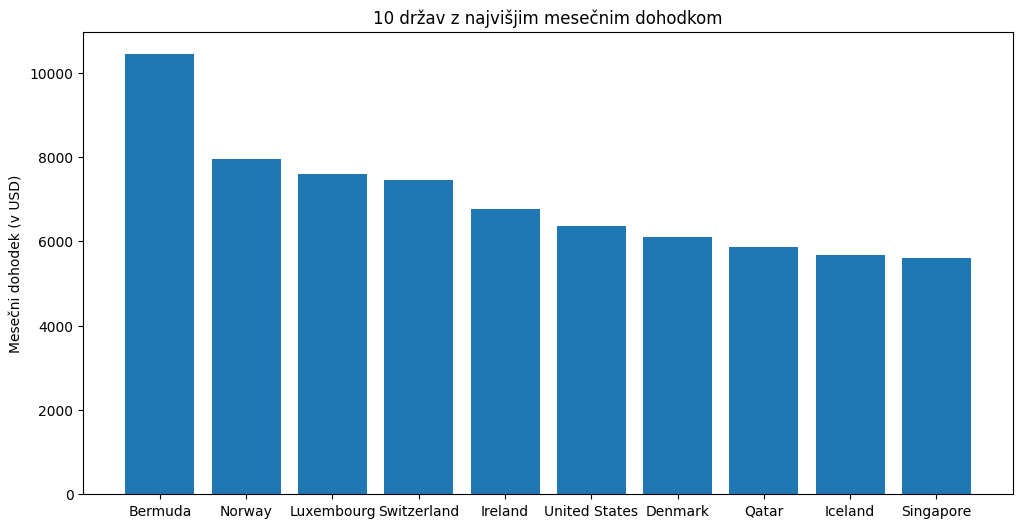

In [ ]:
# poglejmo 10 držav, ki imajo na prebivalca največji mesečni dohodek
# spodnja funkcija izlušči 10 držav razvrščenih po mesečnih dohodkih od 
# najvišjega navzdol in izriše graf

def izlusci_narisi_graf(csv_datoteka):
    top_10_drzav = csv_datoteka.sort_values(by='Mesecni dohodek', ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_drzav['Drzava'], top_10_drzav['Mesecni dohodek'])
    plt.ylabel('Mesečni dohodek (v USD)')
    plt.title('10 držav z najvišjim mesečnim dohodkom')
    plt.show()

izlusci_narisi_graf(podatki_csv)


In [32]:
podatki_o_drzavi('Bermuda', podatki_csv)
podatki_o_drzavi('Norway', podatki_csv)
vrni_povprecja(podatki_csv)

Bermuda:
Mesečni dohodek: 10437
Indeks stroškov: 157.9
Indeks kupne moči: 103.8 

Norway:
Mesečni dohodek: 7959
Indeks stroškov: 108.1
Indeks kupne moči: 115.7 

Povprečen indeks stroškov: 59.8
Povprečen mesečni dohodek: 2046
Povprečen indeks kupne moči: 42.0


Najvišji dohodek ima Bermuda, ki pa ni samostojna država, ampak britanski teritorij v Atlantskem oceanu. Poleg tega ima s 157.9 tudi najvišjega izmed indeksov stroškov, njen indeks kupne moči pa je s 103.8 tudi visoko nad povprečjem (42.0). Bogastvo Bermude temelji na finančnih storitvah in davčnih ugodnostih, ki privabljajo mednarodna podjetja ali premožne posameznike. Tako visok indeks stroškov ima zaradi več razlogov:
- zaradi nizke stopnje obdavčenosti kapitala, je uvedla višje davke na nepremičnine, uvoz surovin, ...
- zaradi uvoza hrane in davkov na uvoz, so cene precej višje
- turizem dvignil cene 

Na drugem mestu je Norveška, ki je tako bogata predvsem zaradi nafte in zemeljskega plina. Je namreč ena izmed največjih izvoznic na svetu. Poleg tega ima tudi učinkovito vlado, z nizko stopnjo korupcije in dobro razvit sektor informacijske tehnologije, lesne industrije in pomorstva.

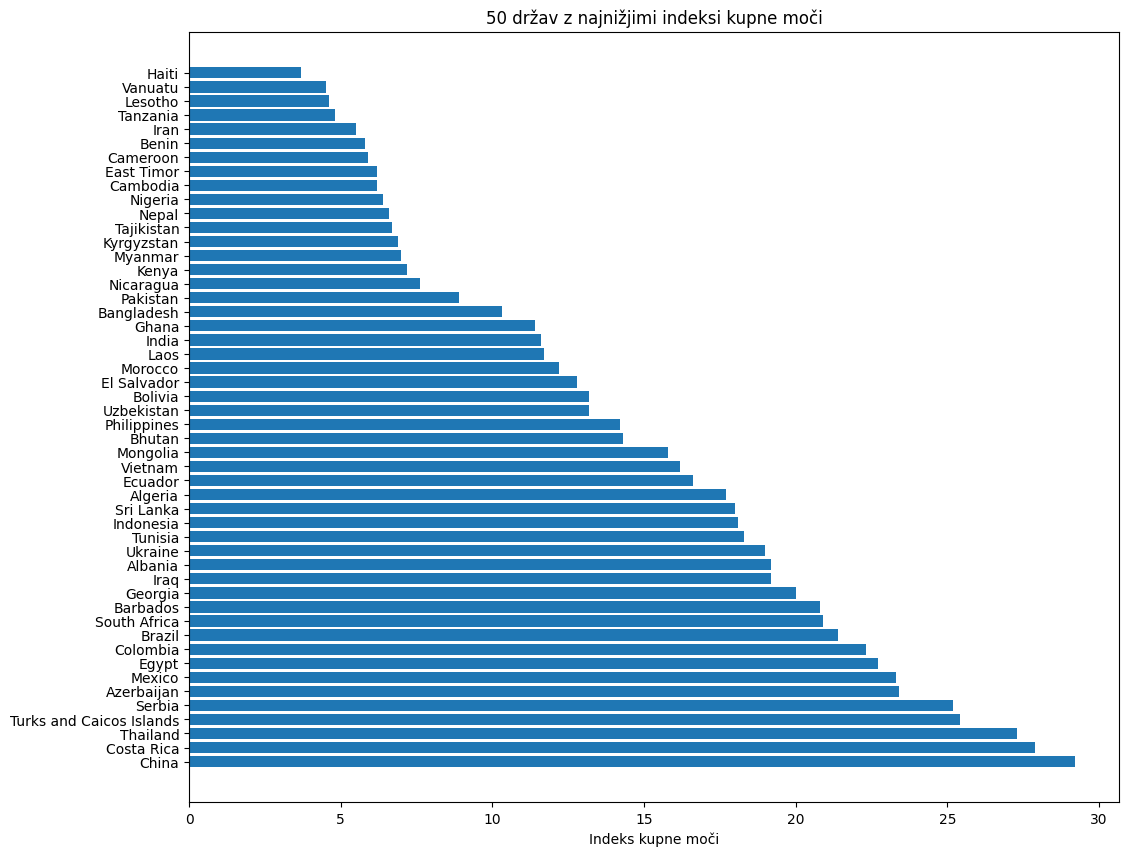

In [ ]:
# poglejmno zdaj 50 držav z najnižjimi indeksi kupne moči
def najnizji_indeksi_kupne_moci(csv_datoteka):
    najnizjih_50 = csv_datoteka.sort_values(by='Indeks kupne moci').head(50)
    # izris grafa
    plt.figure(figsize=(12, 10))
    plt.barh(najnizjih_50['Drzava'], najnizjih_50['Indeks kupne moci'])
    plt.xlabel('Indeks kupne moči')
    plt.title('50 držav z najnižjimi indeksi kupne moči')
    plt.gca().invert_yaxis()
    plt.show()

najnizji_indeksi_kupne_moci(podatki_csv)

In [33]:
podatki_o_drzavi('Haiti', podatki_csv)
vrni_povprecja(podatki_csv)

Haiti:
Mesečni dohodek: 134
Indeks stroškov: 57.6
Indeks kupne moči: 3.7 

Povprečen indeks stroškov: 59.8
Povprečen mesečni dohodek: 2046
Povprečen indeks kupne moči: 42.0


Najnižjo kupno moč imajo Haiti. Gre za državo v Karibskem morju, ki je ena izmed najrevnejših na Zahodni polobli. Tako slab finančni položaj pa je posledica več različnih okoliščin:
- nekoč so bili francoska kolonija, zatem pa je potekala dolgoletna vojna za osamosvojitev,
- politična nestabilnost,
- izpostavljenost naravnim nesrečam,
- omejena infrastruktura.

Poglejmo še kakšen je indeks stroškov v odvisnosti od mesečnega dohodka. Hipoteza je, da se bo z večanjem mesečnega dohodka, večal tudi indeks stroškov.

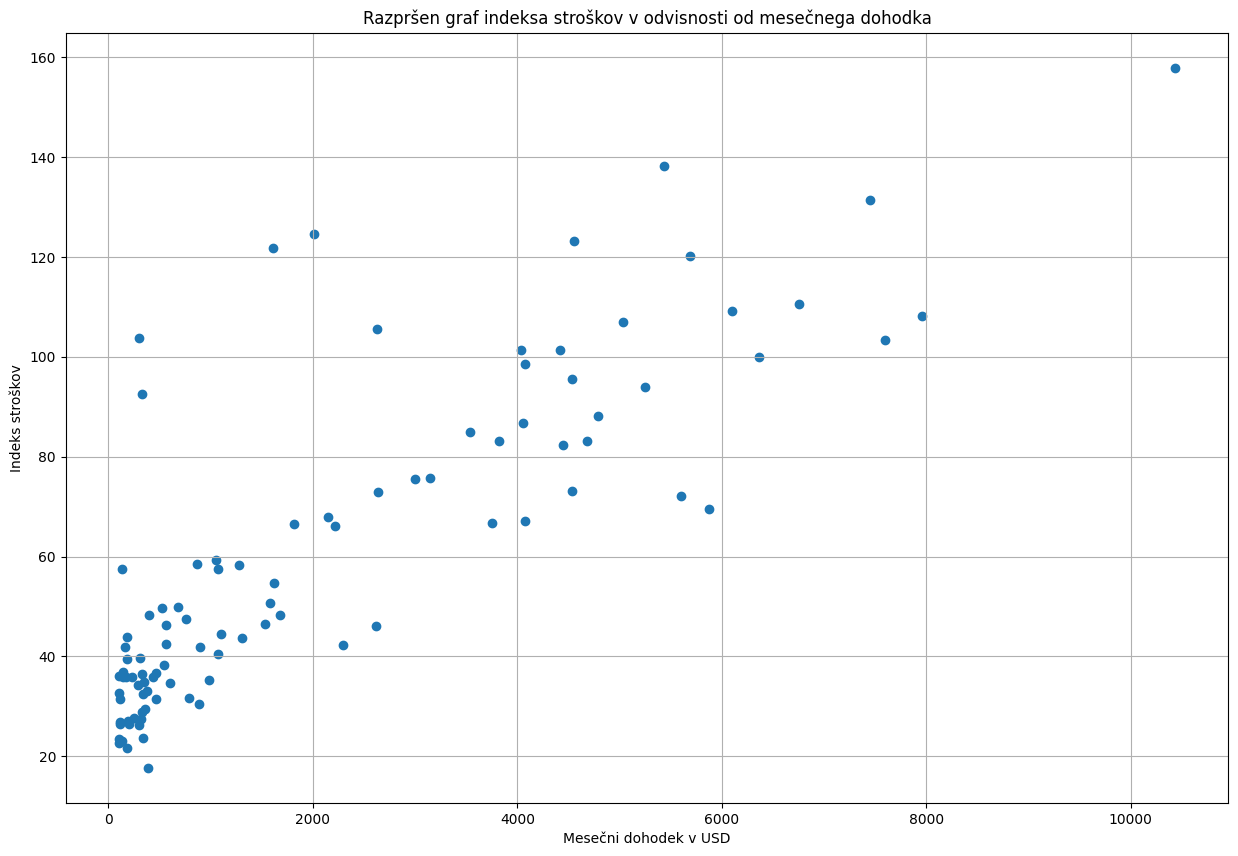

In [ ]:
# funkcija vrne razpršen graf indeksa stroškov v odvisnosti od mesečnega dohodka

def narisi_razprsen_graf(csv_datoteka):
    plt.figure(figsize=(15, 10))
    plt.scatter(csv_datoteka['Mesecni dohodek'], csv_datoteka['Indeks stroskov'])
    plt.xlabel('Mesečni dohodek v USD')
    plt.ylabel('Indeks stroškov')
    plt.title('Razpršen graf indeksa stroškov v odvisnosti od mesečnega dohodka')
    plt.grid(True)
    plt.show()

narisi_razprsen_graf(podatki_csv)

Kot lahko vidimo se indeks stroškov in mesečni dohodek večata premosorazmerno. Kar je tudi smiselno, saj v razvitejših državah ljudje z višjim dohodkom imajo na razpolago več denarja, zato ga želijo več tudi zapraviti in tako povečano povpraševanje po dobrinah in storitvah privede do dviga cen le-teh. Zato je indeks stroškov načeloma višji v državah z višjimi dohodki, saj ljudje tam porabijo več za podobne izdelke in storitve.

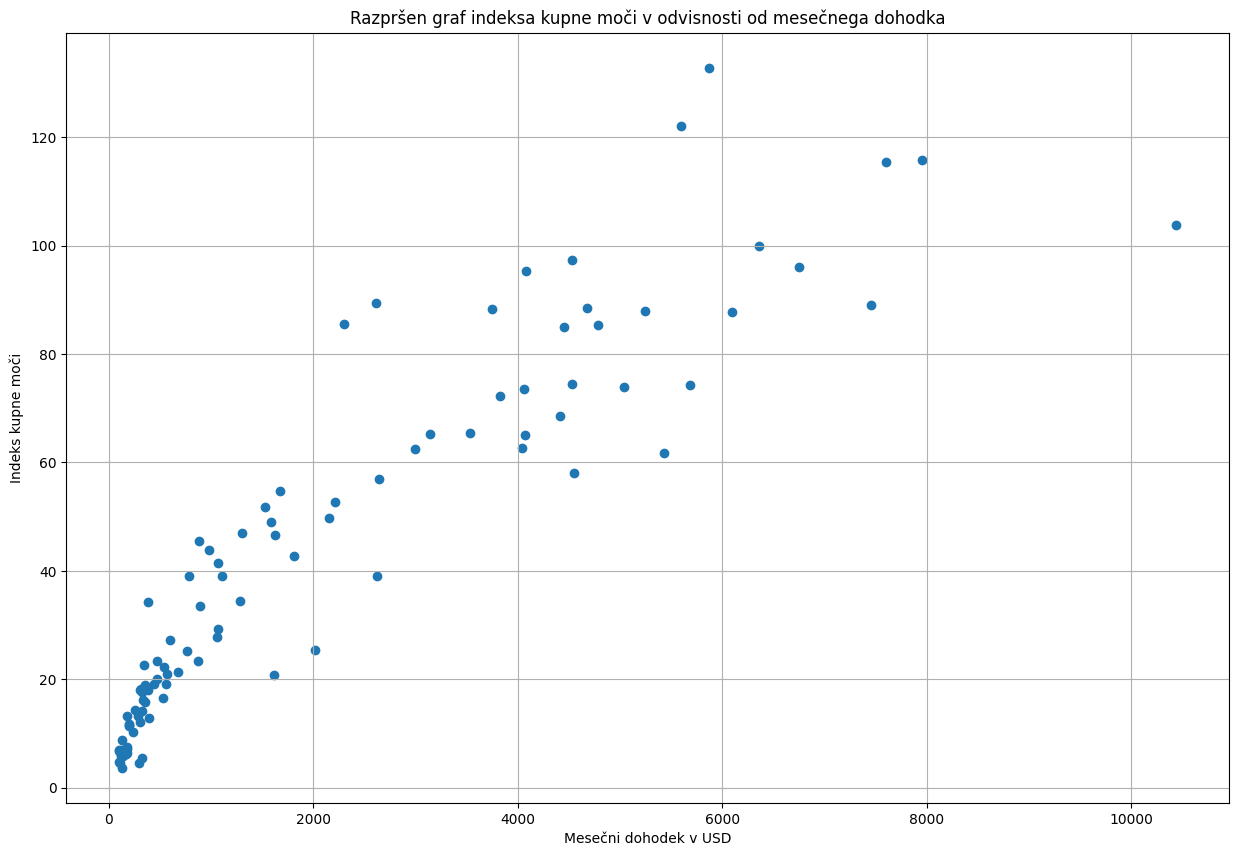

In [ ]:
# sedaj poglejmo, kako sta med sabo povezana mesečni dohodek in indeks kupne moči

def razprsen_graf_kupna_moc(csv_datoteka):
    plt.figure(figsize=(15, 10))
    plt.scatter(csv_datoteka['Mesecni dohodek'], csv_datoteka['Indeks kupne moci'])
    plt.xlabel('Mesečni dohodek v USD')
    plt.ylabel('Indeks kupne moči')
    plt.title('Razpršen graf indeksa kupne moči v odvisnosti od mesečnega dohodka')
    plt.grid(True)
    plt.show()

razprsen_graf_kupna_moc(podatki_csv)

Tudi tu je ravno tako kot indeks stroškov, indeks kupne moči v premosorazmerni povezavi z mesečnim dohodkom. Višji mesečni dohodek običajno pomeni tudi večjo kupno moč. Če ima oseba visok mesečni dohodek in hkrati živi v državi z nizkimi cenami, bo njena kupna moč relativno visoka, saj si lahko privošči več dobrin in storitev.

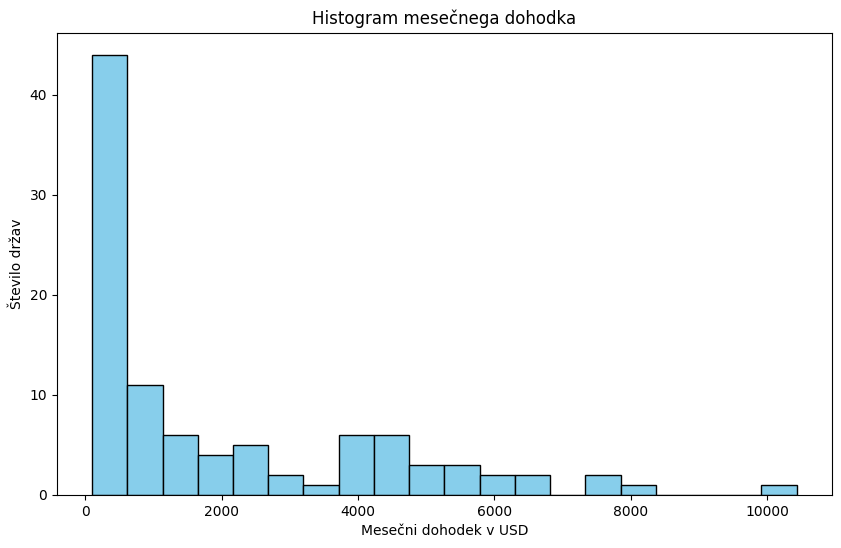

In [36]:
def histogram(csv_datoteka):
    plt.figure(figsize=(10, 6))
    plt.hist(csv_datoteka['Mesecni dohodek'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram mesečnega dohodka')
    plt.xlabel('Mesečni dohodek v USD')
    plt.ylabel('Število držav')
    plt.show()
histogram(podatki_csv)


Kot vidimo, ima velika večina držav zelo nizek dohodek in živijo na pragu revščine, potem pa se začne število držav manjšati, nakar se pri 4000 USD spet dvigne in nato spet enakomerno pada.